## Assignment 1 - Prediction Part

In [1]:
import os
import numpy as np
import pandas as pd

sessions = np.arange(25, 76)
data=[]

for session in sessions:
    directory = "./TXT/Session "+str(session)+" - "+str(1945+session)
    # directory = f"./TXT/Session {session} - {1945+session}"
    for filename in os.listdir(directory):
        # f = open(os.path.join(directory, filename))
        with open(os.path.join(directory, filename)) as f:
            if filename[0]==".": #ignore hidden files
                continue
            splt = filename.split("_")
            data.append([session, 1945+session, splt[0], f.read()])

df_speech = pd.DataFrame(data, columns=['Session','Year','ISO-alpha3 Code','Speech'])
df_codes = pd.read_csv('UNSD — Methodology.csv', sep=";")

# Solution
df_un_merged =  pd.merge(df_codes, df_speech, how="right", on="ISO-alpha3 Code")[["Country or Area", "Region Name","Sub-region Name", "ISO-alpha3 Code","Least Developed Countries (LDC)", "Session", "Year", "Speech"]]
df_un_merged = df_un_merged.set_index(['Year', 'ISO-alpha3 Code'])



Country or Area Region Name  \
Year ISO-alpha3 Code                               
1970 AUT                     Austria      Europe   
     MEX                      Mexico    Americas   
     COG                       Congo      Africa   
     DZA                     Algeria      Africa   
     LKA                   Sri Lanka        Asia   
...                              ...         ...   
2020 HRV                     Croatia      Europe   
     GAB                       Gabon      Africa   
     MCO                      Monaco      Europe   
     AND                     Andorra      Europe   
     BHR                     Bahrain        Asia   

                                      Sub-region Name  \
Year ISO-alpha3 Code                                    
1970 AUT                               Western Europe   
     MEX              Latin America and the Caribbean   
     COG                           Sub-Saharan Africa   
     DZA                              Northern Africa   
     LKA                                Southern Asia   
...                                               ...   
2020 HRV                              Southern Europe   
     GAB                           Sub-Saharan Africa   
     MCO                               Western Europe   
     AND                              Southern Europe   
     BHR                                 Western Asia   

                     Least Developed Countries (LDC)  Session  \
Year ISO-alpha3 Code                                            
1970 AUT                                         NaN       25   
     MEX                                         NaN       25   
     COG                                         NaN       25   
     DZA                                         NaN       25   
     LKA                                         NaN       25   
...                                              ...      ...   
2020 HRV                                         NaN       75   
     GAB                                         NaN       75   
     MCO                                         NaN       75   
     AND                                         NaN       75   
     BHR                                         NaN       75   

                                                                 Speech  
Year ISO-alpha3 Code                                                     
1970 AUT              155.\t  May I begin by expressing to Ambassado...  
     MEX              33.\t  Mr. President, I take great pleasure in...  
     COG              122.\t  I cannot begin my intervention without...  
     DZA              1.  The delegation of Algeria is very pleased ...  
     LKA              176.\t Mr. President, the delegation of Ceylon...  
...                                                                 ...  
2020 HRV              Mr President, Excellencies\nAll protocol obser...  
     GAB              Mr. President, Majesties,\nLadies and Gentleme...  
     MCO              Mr. President of the General Assembly,\nMr. Se...  
     AND              Mr. President,\nMr. Secretary General,\nYour E...  
     BHR              In the name of Allah, the most gracious, the m...  

[8481 rows x 6 columns]

### Import Arms dataset and  pre-process


In [2]:
#import war data
arms = pd.read_csv('Arms_Imports.csv')
arms.rename(columns = {'Country/Region/Group':'Country'}, inplace = True)
arms = arms.fillna(0)
arms = arms.set_index("Country")
arms.head(n=10)

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,4.0,7.0,89.0,254.0,405.0,...,523.0,235.0,288.0,116.0,174.0,252.0,322.0,396.0,240.0,16403
African Union**,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,78
Albania,20.0,10.0,11.0,20.0,22.0,132.0,98.0,42.0,47.0,129.0,...,15.0,7.0,7.0,7.0,0.0,2.0,3.0,5.0,1.0,2771
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,661.0,362.0,710.0,906.0,2911.0,1139.0,1291.0,164.0,661.0,32383
Amal (Lebanon)*,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60
ANC (South Africa)*,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,30.0,2.0,47.0,152.0,110.0,272.0,169.0,51.0,8544
Anti-Castro rebels (Cuba)*,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
Argentina,75.0,445.0,38.0,4.0,5.0,0.0,39.0,14.0,70.0,161.0,...,5.0,13.0,6.0,21.0,17.0,45.0,18.0,50.0,7.0,12171


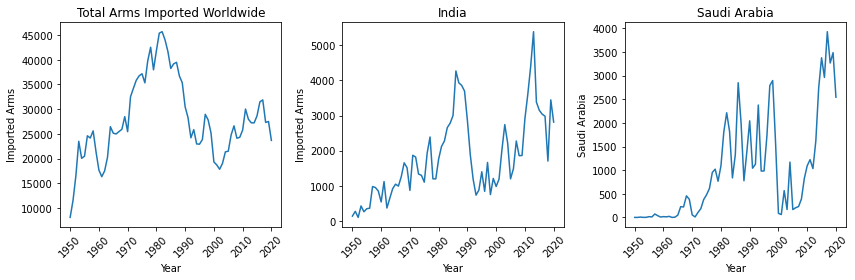

In [3]:
import matplotlib.pyplot as plt

wars_for_plot = arms.drop(columns = ["Total"])

fig, axes = plt.subplots(1, 3, figsize=(12, 4)) 

# Plot Total
axes[0].plot(wars_for_plot.loc["Total"])
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Imported Arms")
axes[0].set_title("Total Arms Imported Worldwide")
axes[0].set_xticks(range(0, len(wars_for_plot.loc["Total"]), 10))
axes[0].tick_params(axis='x', rotation=45)  

# Plot India
axes[1].plot(wars_for_plot.loc["India"]) 
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Imported Arms")  
axes[1].set_title("India")  
axes[1].set_xticks(range(0, len(wars_for_plot.loc["Total"]), 10))
axes[1].tick_params(axis='x', rotation=45) 

#Plot Saudi Arabia
axes[2].plot(wars_for_plot.loc["Saudi Arabia"])  
axes[2].set_xlabel("Year")
axes[2].set_ylabel("Saudi Arabia")  
axes[2].set_title("Saudi Arabia")  
axes[2].set_xticks(range(0, len(wars_for_plot.loc["Total"]), 10))
axes[2].tick_params(axis='x', rotation=45)  

plt.tight_layout()
plt.show()


In [4]:
#devide every row with Total imports to normalize 
arms.iloc[:, :-1] = arms.iloc[:, :-1].div(arms['Total'], axis=0)

#Drop "Total" from row and column
arms = arms.drop("Total")
arms = arms.drop(columns = ["Total"])


#make country a column
arms.reset_index(inplace=True) 

#Melt dataframe so as every column (every year) becomes one column
melted_df = pd.melt(arms, id_vars=['Country'], var_name='Year', value_name='Import')
melted_df['Year'] = melted_df['Year'].astype(int)
melted_df.set_index('Year', inplace=True)
melted_df.reset_index(inplace=True)

#merge speeches with imports of arms dataset
df_un_merged = df_un_merged.rename(columns={'Country or Area': 'Country'})
df_un_merged.reset_index()
merged_df = df_un_merged.merge(melted_df, on=['Country', 'Year'], how='inner')

#drop unnecessary columns
merged_df = merged_df.drop('Region Name', axis=1)
merged_df = merged_df.drop('Sub-region Name', axis=1)
merged_df = merged_df.drop('Least Developed Countries (LDC)', axis=1)
merged_df = merged_df.drop('Session', axis=1)

arms_speaches = merged_df

arms_speaches["Import"] = arms_speaches["Import"] * 100

arms_speaches ## Import is normalized as the percentage of total imports for every country over the years

,Country,Year,Speech,Import
0,Austria,1970,155.\t May I begin by expressing to Ambassado...,2.649184
1,Mexico,1970,"33.\t Mr. President, I take great pleasure in...",1.318540
2,Congo,1970,122.\t I cannot begin my intervention without...,1.789264
3,Algeria,1970,1. The delegation of Algeria is very pleased ...,0.043233
4,Sri Lanka,1970,"176.\t Mr. President, the delegation of Ceylon...",0.000000
...,...,...,...,...
7103,Thailand,2020,"Mr. President,\nFirst of all, please allow me ...",1.039838
7104,Paraguay,2020,"President of the General Assembly,\nExcellenci...",0.000000
7105,Croatia,2020,"Mr President, Excellencies\nAll protocol obser...",0.000000
7106,Gabon,2020,"Mr. President, Majesties,\nLadies and Gentleme...",0.000000


In [5]:
#Remove outliers
Q3 = arms_speaches["Import"].quantile(0.99)
arms_speaches = arms_speaches[arms_speaches["Import"] > 1]
arms_speaches = arms_speaches[arms_speaches["Import"] < 40]
arms_speaches = arms_speaches.reset_index(drop=True)


In [6]:
arms_speaches

,Country,Year,Speech,Import
0,Austria,1970,155.\t May I begin by expressing to Ambassado...,2.649184
1,Mexico,1970,"33.\t Mr. President, I take great pleasure in...",1.318540
2,Congo,1970,122.\t I cannot begin my intervention without...,1.789264
3,Argentina,1970,177.\t : It is a fortunate coincidence that pr...,2.037630
4,Albania,1970,33: May I first convey to our President the co...,9.022014
...,...,...,...,...
2673,Romania,2020,"Mr. President of the General Assembly,\nMr. Se...",1.032921
2674,Benin,2020,"President of the General Assembly,\nHeads of S...",1.075269
2675,Ukraine,2020,"Distinguished Mr. President,\nYour Excellences...",12.587413
2676,Thailand,2020,"Mr. President,\nFirst of all, please allow me ...",1.039838


## 1. Find war keyword frequency in speaches and correlate the frequency with Imports

In [7]:
#"keywords" is a dataset with 668 keywords related to war.  
keywords = pd.read_csv('keyword.csv')
keywords = keywords.drop_duplicates()
keywords.reset_index(drop=True, inplace=True)
keywords = keywords['keywords'].str.lower()
keywords.head()

0           arms imports
1             arms trade
2       defense industry
3     military equipment
4    weapons procurement
Name: keywords, dtype: object

In [12]:
# Calculate the frequency for every keyword in the first i speeches and normalize it by devideing the sum of 
# keywords in the text with the total lenght of the text
import re


x = 30
#x = len(arms_speaches) #change this number depending on how many speeches you want to process

sums_list = []

for i in range(x):
    text = arms_speaches["Speech"][i]
    sum = 0
    for word in keywords:
        word_to_count = word
        pattern = r'\b' + re.escape(word_to_count) + r'\b'
        count = len(re.findall(pattern, text, flags=re.IGNORECASE))  
        if count != 0:
            sum = sum + count
    sums_list.append(sum/len(arms_speaches["Speech"][i])*100)
    
freq_df = pd.DataFrame({'Kword_freq': sums_list})


#merge imports with keword frequency for the first x speeches
imports = arms_speaches["Import"][:x]
imports = imports.reset_index()
imports = imports.drop(columns = ["index"])
freq_df["Imports"] = imports
keyword_import = freq_df
keyword_import.head()

,Kword_freq,Imports
0,0.202916,2.649184
1,0.260141,1.318540
2,0.216808,1.789264
3,0.194639,2.037630
4,0.381219,9.022014


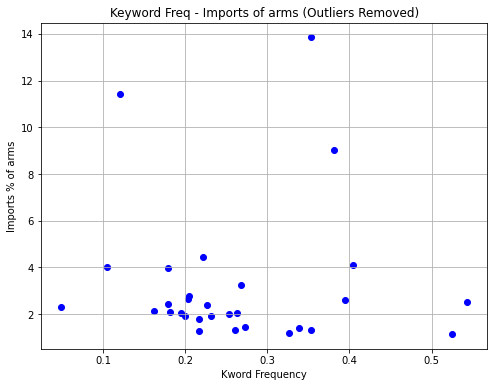

In [13]:
# Plot the filtered data
plt.figure(figsize=(8, 6))
plt.scatter(keyword_import["Kword_freq"], keyword_import["Imports"], c='b', marker='o')
plt.title("Keyword Freq - Imports of arms (Outliers Removed)")
plt.xlabel("Kword Frequency")
plt.ylabel("Imports % of arms")

# Show the plot
plt.grid(True)
plt.show()

Best hyperparameters found:
{'linearregression__fit_intercept': True, 'linearregression__normalize': True, 'polynomialfeatures__degree': 0}

Model accuracy:
Mean squared error: 8.62208
R squared: 0.00000



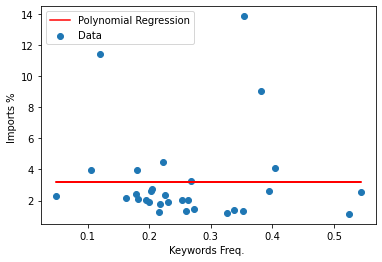

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

X_train = keyword_import['Kword_freq'].values
y_train = keyword_import['Imports'].values

# Create grid of parameters to test through cross-validation
param_grid = {'polynomialfeatures__degree': np.arange(20),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

model = make_pipeline(PolynomialFeatures(), LinearRegression())
grid = GridSearchCV(model, param_grid, cv=10)
grid.fit(X_train[:, np.newaxis], y_train);

# #Test data
# x = happinessdataframe.dropna().loc(axis=0)[:, 2018][["Freedom to make life choices","Perceptions of corruption"]]
# X_test = x["Freedom to make life choices"].values
# y_test = x["Perceptions of corruption"].values

# Let us know check the results with the best estimator after Grid Search
print("Best hyperparameters found:")
print(grid.best_params_)
y_pred = grid.best_estimator_.predict(X_train[:, np.newaxis])
print("")

# Compute test error and variance score
print("Model accuracy:")
print("Mean squared error: %.5f" % mean_squared_error(y_train, y_pred))
print('R squared: %.5f' % r2_score(y_train, y_pred))
print("")


# Plot the original data points and the regression line
plt.scatter(X_train, y_train, label='Data')
plt.plot(X_train, y_pred, color='red', label='Polynomial Regression')
plt.xlabel('Keywords Freq. ')
plt.ylabel('Imports % ')
plt.legend()
plt.show()


## 2. Td-Idf Method correlation with Imports

In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re


#Download packages
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

# Initialize the WordNet lemmatizer and stopwords set
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def process_text(text):
    words = word_tokenize(text)
    filtered_words = [lemmatizer.lemmatize(word) for word in words if word.lower() not in stop_words and word.isalnum()]
    processed_text = ' '.join(filtered_words)
    
    return processed_text

def remove_non_words(text):
    if isinstance(text, str):
        cleaned_text = ' '.join(re.findall(r'\b[a-zA-Z]+\b', text))
        return cleaned_text
    else:
        return text 

def lowercase_text(text):
    if isinstance(text, str):
        return text.lower()
    else:
        return text



In [16]:
arms_speaches

,Country,Year,Speech,Import
0,Austria,1970,155.\t May I begin by expressing to Ambassado...,2.649184
1,Mexico,1970,"33.\t Mr. President, I take great pleasure in...",1.318540
2,Congo,1970,122.\t I cannot begin my intervention without...,1.789264
3,Argentina,1970,177.\t : It is a fortunate coincidence that pr...,2.037630
4,Albania,1970,33: May I first convey to our President the co...,9.022014
...,...,...,...,...
2673,Romania,2020,"Mr. President of the General Assembly,\nMr. Se...",1.032921
2674,Benin,2020,"President of the General Assembly,\nHeads of S...",1.075269
2675,Ukraine,2020,"Distinguished Mr. President,\nYour Excellences...",12.587413
2676,Thailand,2020,"Mr. President,\nFirst of all, please allow me ...",1.039838


In [17]:
arms_speaches['Speech'] = arms_speaches['Speech'].apply(process_text)

In [18]:
arms_speaches["Speech"] = arms_speaches["Speech"].apply(remove_non_words)

In [21]:
arms_speaches['Speech'] = arms_speaches['Speech'].apply(lowercase_text)

In [22]:
arms_speaches["Speech"]

0       may begin expressing ambassador hambro behalf ...
1       president take great pleasure following fine t...
2       begin intervention without referring solemn re...
3       fortunate coincidence precisely time united na...
4       may first convey president congratulation alba...
                              ...                        
2673    president general assembly secretary general e...
2674    president general assembly heads state governm...
2675    distinguished president excellences ladies gen...
2676    president first please allow extend sincere co...
2677    name allah gracious merciful peace mercy bless...
Name: Speech, Length: 2678, dtype: object

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

# create tfidf table 

tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit_transform(arms_speaches['Speech'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names() )

tfidf_df = pd.concat([arms_speaches[['Country', 'Year', 'Import']], tfidf_df], axis=1)


In [24]:
tfidf_df

,Country,Year,Import,aa,aaf,aay,ab,ababa,aback,abaco,...,zukang,zuleta,zulfikar,zulfiqar,zulu,zulus,zuma,zurbatiya,zurich,zvei
0,Austria,1970,2.649184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Mexico,1970,1.318540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Congo,1970,1.789264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Argentina,1970,2.037630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Albania,1970,9.022014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2673,Romania,2020,1.032921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2674,Benin,2020,1.075269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2675,Ukraine,2020,12.587413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2676,Thailand,2020,1.039838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7fb60ffca2e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb5b00100a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb60ffcaf10>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb5b0010d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb61b59c640>],
 'means': []}

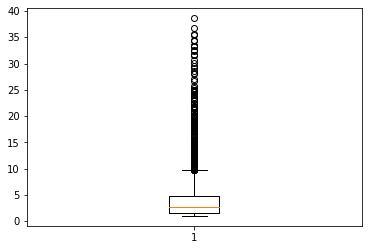

In [25]:
plt.boxplot(tfidf_df['Import'])


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score


test = tfidf_df[(tfidf_df["Year"] == 2018) | (tfidf_df["Year"] == 2019)]
train = tfidf_df[~((tfidf_df["Year"] == 2018) | (tfidf_df["Year"] == 2019))]

X_train = train.iloc[:, 3:]
y_train = train['Import']
y_train_log = np.log1p(y_train) 

X_test = test.iloc[:, 3:]
y_test = test['Import']

model = LinearRegression()
model.fit(X_train, y_train_log)

# Make predictions
#y_pred = model.predict(X_test)
# Make predictions on the test set
y_pred_log = model.predict(X_test)

y_pred = np.expm1(y_pred_log)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R squared: {r2}")



MSE: 38.206345906807705
R squared: 0.2222464218378346


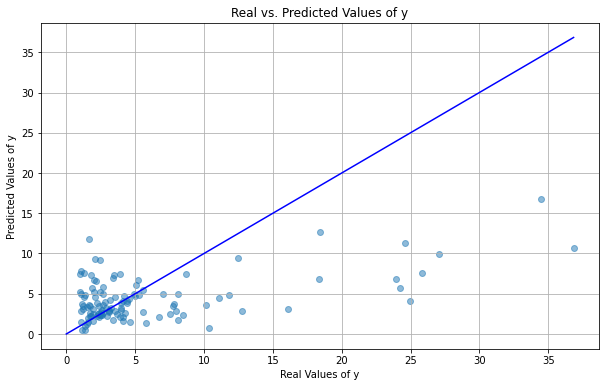

In [27]:
import matplotlib.pyplot as plt

# Plot real vs. predicted values of y
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Real Values of y")
plt.ylabel("Predicted Values of y")
plt.title("Real vs. Predicted Values")

plt.plot([0, max(y_test)], [0, max(y_test)], color='blue', linestyle='-')

plt.grid(True)
plt.show()


## 3. Sentiment Analysis correlation with imports

In [39]:
# import speech dataset
sessions = np.arange(25, 76)
data=[]

for session in sessions:
    directory = "./TXT/Session "+str(session)+" - "+str(1945+session)
    # directory = f"./TXT/Session {session} - {1945+session}"
    for filename in os.listdir(directory):
        # f = open(os.path.join(directory, filename))
        with open(os.path.join(directory, filename)) as f:
            if filename[0]==".": #ignore hidden files
                continue
            splt = filename.split("_")
            data.append([session, 1945+session, splt[0], f.read()])

df_speech = pd.DataFrame(data, columns=['Session','Year','ISO-alpha3 Code','Speech'])
df_speech.set_index(["Year", "ISO-alpha3 Code"], inplace=True)
countries1970_list = df_speech.loc[1970].index.tolist()
countries1970_list.remove('GBR') # no arms import data for GBR

In [40]:
# import NRC Emotion Lexicon
directory = "NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
#directory = "./NRC-Emotion-Lexicon/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt"
emotion_lexicon = pd.read_csv(directory, sep="\t", header=None, names=["word", "emotion", "value"])

In [41]:
emotion_lexicon.head()
emotions_list = emotion_lexicon["emotion"].unique()

In [42]:
## Estimate sentiment in a single speech
# imports
from nltk import word_tokenize
from nltk.corpus import stopwords

# speech
text = df_speech.loc[1970, 'AUT']['Speech']

# preprocessing
def preprocess(words):
    sw = stopwords.words("english")
    no_sw = []
    for w in words:
        if (w not in sw):
            no_sw.append(w)
    return no_sw

# tokenization, stopword removal
words = word_tokenize(text)
words = preprocess(words)

# dataframe for counting
sentiment_dict = {"speech": [words], "count_anger": 0, "count_anticipation": 0, "count_disgust": 0, 
                 "count_fear": 0, "count_joy": 0, "count_negative": 0, "count_positive": 0,
                 "count_sadness": 0, "count_surprise": 0, "count_trust": 0}
sentiment_df = pd.DataFrame(sentiment_dict)
sentiment_df

,speech,count_anger,count_anticipation,count_disgust,count_fear,count_joy,count_negative,count_positive,count_sadness,count_surprise,count_trust
0,"[155, ., May, I, begin, expressing, Ambassador...",0,0,0,0,0,0,0,0,0,0


In [44]:
# count emotion words in a list of strings
def count_emotion(words: list, emotion: str):
    count_emotion = 0
    emotion_word_list = emotion_lexicon[(emotion_lexicon["emotion"] == emotion) & 
                                      (emotion_lexicon["value"] == 1)]["word"].tolist()
    for w in words:
        if w in emotion_word_list:
            count_emotion +=1
    
    return count_emotion

count_emotion(words, "disgust")

22

In [45]:
## Count use of sentiment words in all speeches
df_speech["tokenized_speech"] = df_speech["Speech"].apply(func=word_tokenize)

In [46]:
df_speech["preprocessed_speech"] = df_speech["tokenized_speech"].apply(func=preprocess)

In [ ]:
### WARNING - THIS CELL TAKES ABOUT 30 MINUTES TO EXECUTE ###
import time
start_time = time.time()

# iterate over emotions and count words for each emotion
for emotion in emotions_list:
    column = "count_" + str(emotion)
    df_speech[column] = df_speech["preprocessed_speech"].apply(func=count_emotion, args=(emotion,))

exec_time = time.time() - start_time
print(f"Execution time: {exec_time} seconds.")

In [47]:
# # save to csv
# path = "./df_speech_with_sentiment_counts.csv"
# df_speech.to_csv(path, sep=";")

KeyboardInterrupt: 

In [55]:
# load from csv
path = "./df_speech_with_sentiment_counts.csv"
df_speech = pd.read_csv(path, sep=";")
df_speech.set_index(["ISO-alpha3 Code", "Year"], inplace=True)

In [56]:
# length of speeches (tokenized speech)
df_speech["speech_length"] = df_speech["tokenized_speech"].apply(func=len)

# share of emotion words
for emotion in emotions_list:
    new_column = "share_" + str(emotion)
    count_column = "count_" + str(emotion)
    df_speech[new_column] = df_speech[count_column] / df_speech["speech_length"]

In [57]:
df_speech

,,Session,Speech,tokenized_speech,preprocessed_speech,count_anger,count_anticipation,count_disgust,count_fear,count_joy,count_negative,...,share_anger,share_anticipation,share_disgust,share_fear,share_joy,share_negative,share_positive,share_sadness,share_surprise,share_trust
ISO-alpha3 Code,Year,,,,,,,,,,,,,,,,,,,,,
AUT,1970,25,155.\t May I begin by expressing to Ambassado...,"['155', '.', 'May', 'I', 'begin', 'by', 'expre...","['155', '.', 'May', 'I', 'begin', 'expressing'...",41,106,22,55,80,86,...,0.000996,0.002576,0.000535,0.001337,0.001944,0.002090,0.006391,0.000972,0.000729,0.004763
MEX,1970,25,"33.\t Mr. President, I take great pleasure in...","['33', '.', 'Mr.', 'President', ',', 'I', 'tak...","['33', '.', 'Mr.', 'President', ',', 'I', 'tak...",28,117,17,47,83,83,...,0.000732,0.003060,0.000445,0.001229,0.002171,0.002171,0.006512,0.001046,0.000837,0.004210
COG,1970,25,122.\t I cannot begin my intervention without...,"['122', '.', 'I', 'can', 'not', 'begin', 'my',...","['122', '.', 'I', 'begin', 'intervention', 'wi...",70,73,34,71,68,128,...,0.002576,0.002686,0.001251,0.002613,0.002502,0.004711,0.007066,0.001730,0.001030,0.004527
DZA,1970,25,1. The delegation of Algeria is very pleased ...,"['1', '.', 'The', 'delegation', 'of', 'Algeria...","['1', '.', 'The', 'delegation', 'Algeria', 'pl...",101,119,31,118,109,157,...,0.002631,0.003100,0.000808,0.003074,0.002840,0.004090,0.007112,0.001902,0.001250,0.005393
LKA,1970,25,"176.\t Mr. President, the delegation of Ceylon...","['176', '.', 'Mr.', 'President', ',', 'the', '...","['176', '.', 'Mr.', 'President', ',', 'delegat...",48,96,27,71,105,125,...,0.001210,0.002419,0.000680,0.001789,0.002646,0.003150,0.007409,0.001159,0.000882,0.004914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HRV,2020,75,"Mr President, Excellencies\nAll protocol obser...","['Mr', 'President', ',', 'Excellencies', 'All'...","['Mr', 'President', ',', 'Excellencies', 'All'...",20,46,14,45,26,67,...,0.000906,0.002084,0.000634,0.002039,0.001178,0.003036,0.006932,0.001269,0.000498,0.004078
GAB,2020,75,"Mr. President, Majesties,\nLadies and Gentleme...","['Mr.', 'President', ',', 'Majesties', ',', 'L...","['Mr.', 'President', ',', 'Majesties', ',', 'L...",24,29,12,33,33,46,...,0.001423,0.001720,0.000712,0.001957,0.001957,0.002728,0.006464,0.001186,0.000712,0.004032
MCO,2020,75,"Mr. President of the General Assembly,\nMr. Se...","['Mr.', 'President', 'of', 'the', 'General', '...","['Mr.', 'President', 'General', 'Assembly', ',...",21,26,6,40,16,52,...,0.001343,0.001663,0.000384,0.002558,0.001023,0.003325,0.005947,0.001343,0.000640,0.002878


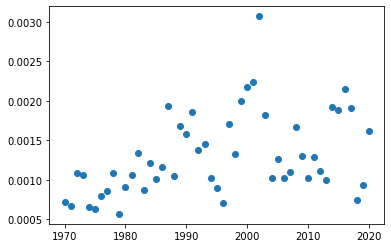

In [58]:
# visual analysis of emotions
data = df_speech.loc['ITA']['share_anger']
x = np.arange(1970, 1970 + len(data), 1)
plt.scatter(x, data)
plt.show()

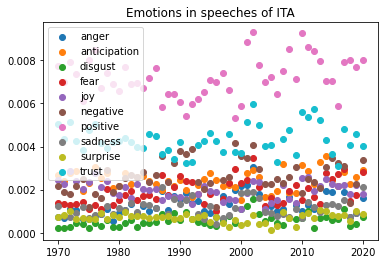

In [59]:
# all emotions for one country
country = 'ITA'
for emotion in emotions_list:
    column = "share_" + str(emotion)
    data = df_speech.loc[country][column]
    x = np.arange(1970, 1970 + len(data), 1)
    plt.scatter(x, data, label=emotion)
    
plt.legend()
title = "Emotions in speeches of " + country
plt.title(title)
plt.show()

In [61]:
# import arms dataset and merge with sentiment scoring
speech_arms_df = pd.read_csv("./normalized_table.csv", sep= ";",index_col=0)
print(speech_arms_df) ### some countries are lost in the importing of the arms purchase data
print(df_speech.shape)
unsd_meth = pd.read_csv("UNSD — Methodology.csv", sep=";")
merged_arms = speech_arms_df.merge(unsd_meth, left_on="Country", right_on="Country or Area")
merged_arms = merged_arms[["Year", "ISO-alpha3 Code", "Country", "Speech", "Import"]]
merged_arms.set_index(["ISO-alpha3 Code", "Year"], inplace=True)
merged_arms.drop(labels=["Speech"], axis=1, inplace=True)
print(merged_arms.shape)

sentiment_arms_df = df_speech.join(merged_arms)
sentiment_arms_df['Import'] = sentiment_arms_df['Import'].fillna(0)
print(sentiment_arms_df.shape)
# normalize arms imports

        Country  Year                                             Speech  \
0       Austria  1970  155.\t  May I begin by expressing to Ambassado...   
1        Mexico  1970  33.\t  Mr. President, I take great pleasure in...   
2         Congo  1970  122.\t  I cannot begin my intervention without...   
3       Algeria  1970  1.  The delegation of Algeria is very pleased ...   
4     Sri Lanka  1970  176.\t Mr. President, the delegation of Ceylon...   
...         ...   ...                                                ...   
7103   Thailand  2020  Mr. President,\nFirst of all, please allow me ...   
7104   Paraguay  2020  President of the General Assembly,\nExcellenci...   
7105    Croatia  2020  Mr President, Excellencies\nAll protocol obser...   
7106      Gabon  2020  Mr. President, Majesties,\nLadies and Gentleme...   
7107    Bahrain  2020  In the name of Allah, the most gracious, the m...   

        Import  
0     2.649184  
1     1.318540  
2     1.789264  
3     0.043233  
4 

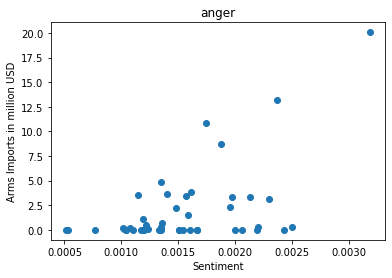

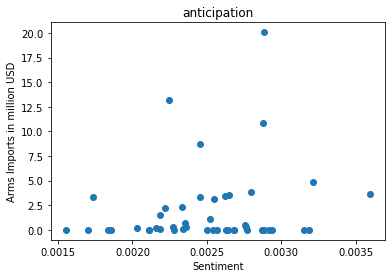

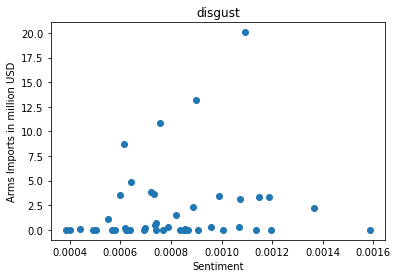

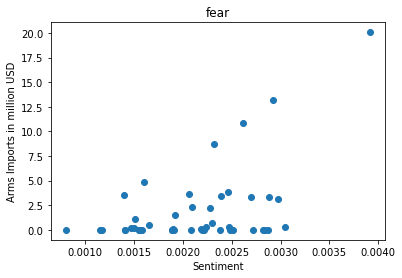

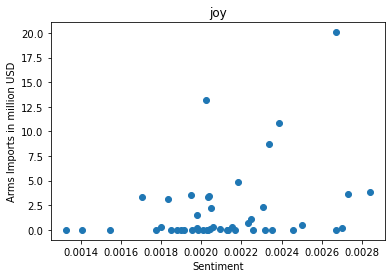

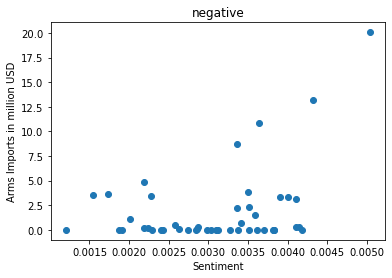

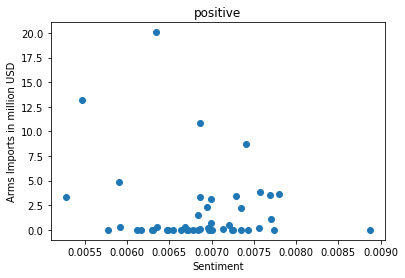

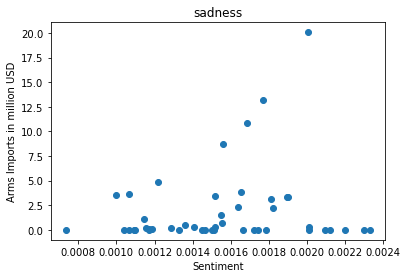

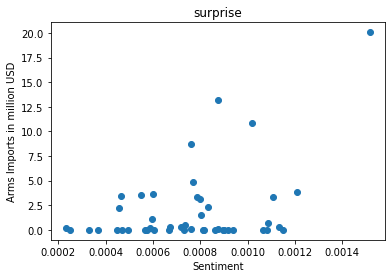

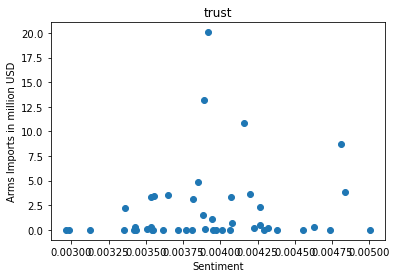

In [62]:
# visual analysis of anger in Austria
for emotion in emotions_list:
    column = "share_" + str(emotion)
    x = sentiment_arms_df.loc['ZMB'][column]
    y = sentiment_arms_df.loc['ZMB']['Import']
    plt.scatter(x, y)
    plt.xlabel("Sentiment")
    plt.ylabel("Arms Imports in million USD")
    plt.title(emotion)
    plt.show()

In [63]:
# regression of imports vs. sentiment
country = 'ITA'
share_list = []
for emotion in emotions_list:
    share_list.append("share_" + emotion)
share_list.remove("share_negative")
share_list.remove("share_positive")

Y = sentiment_arms_df.loc[country]['Import']
X = sentiment_arms_df.loc[country][share_list]

# multiple linear regression model
model = LinearRegression(fit_intercept=True)

model.fit(X, Y)

print(model.intercept_)
print(model.coef_)

# Testing
Ytest = Y.values
Ypredict = model.predict(X)

print(mean_squared_error(Ytest, Ypredict))
print(r2_score(Ytest, Ypredict))

1.2641944822143805
[  557.05116906 -1246.87987041  -624.36247321  -784.11786603
  2594.68068398   424.44951497  -508.89284978  -261.39386524]
0.5302586122994345
0.5048145926939478


In [64]:
sentiment_arms_df.loc['AUT']

,Session,Speech,tokenized_speech,preprocessed_speech,count_anger,count_anticipation,count_disgust,count_fear,count_joy,count_negative,...,share_disgust,share_fear,share_joy,share_negative,share_positive,share_sadness,share_surprise,share_trust,Country,Import
Year,,,,,,,,,,,,,,,,,,,,,
1970,25,155.\t May I begin by expressing to Ambassado...,"['155', '.', 'May', 'I', 'begin', 'by', 'expre...","['155', '.', 'May', 'I', 'begin', 'expressing'...",41,106,22,55,80,86,...,0.000535,0.001337,0.001944,0.002090,0.006391,0.000972,0.000729,0.004763,Austria,2.649184
1971,26,112.\t Mr. President. I am happy to convey to...,"['112', '.', 'Mr.', 'President', '.', 'I', 'am...","['112', '.', 'Mr.', 'President', '.', 'I', 'ha...",37,76,10,49,63,62,...,0.000317,0.001552,0.001996,0.001964,0.006873,0.001109,0.000729,0.004086,Austria,3.291410
1972,27,"Mr. President, I take the greatest pleasure in...","['Mr.', 'President', ',', 'I', 'take', 'the', ...","['Mr.', 'President', ',', 'I', 'take', 'greate...",24,64,7,34,47,50,...,0.000306,0.001486,0.002054,0.002185,0.006818,0.000918,0.000787,0.004851,Austria,2.488627
1973,28,﻿1.\tThe twenty-eighth session of the General ...,"['\ufeff1', '.', 'The', 'twenty-eighth', 'sess...","['\ufeff1', '.', 'The', 'twenty-eighth', 'sess...",27,69,14,32,46,47,...,0.000566,0.001294,0.001860,0.001900,0.006186,0.001011,0.001092,0.003841,Austria,0.588708
1974,29,"Sir, it is more than a mere custom, and for me...","['Sir', ',', 'it', 'is', 'more', 'than', 'a', ...","['Sir', ',', 'mere', 'custom', ',', 'agreeable...",31,65,19,50,53,72,...,0.000758,0.001995,0.002115,0.002873,0.006465,0.001397,0.001038,0.004150,Austria,0.588708
1975,30,81.\tTogether with all the other Members of th...,"['81', '.', 'Together', 'with', 'all', 'the', ...","['81', '.', 'Together', 'Members', 'United', '...",38,72,23,58,63,80,...,0.000756,0.001906,0.002070,0.002629,0.005718,0.001446,0.000887,0.003549,Austria,0.160557
1976,31,"103. Mr. President, in electing you President ...","['103', '.', 'Mr.', 'President', ',', 'in', 'e...","['103', '.', 'Mr.', 'President', ',', 'electin...",26,88,15,34,66,49,...,0.000452,0.001025,0.001989,0.001477,0.006450,0.000874,0.000663,0.003617,Austria,0.321113
1977,32,"﻿1.\tMay I through you, Mr. President, congrat...","['\ufeff1', '.', 'May', 'I', 'through', 'you',...","['\ufeff1', '.', 'May', 'I', ',', 'Mr.', 'Pres...",29,83,18,46,70,71,...,0.000504,0.001288,0.001960,0.001988,0.006271,0.001064,0.000896,0.003779,Austria,0.000000
1978,33,﻿153.\tIt gives me great pleasure to congratul...,"['\ufeff153', '.', 'It', 'gives', 'me', 'great...","['\ufeff153', '.', 'It', 'gives', 'great', 'pl...",34,99,16,54,77,75,...,0.000470,0.001586,0.002261,0.002202,0.007106,0.001145,0.000881,0.004140,Austria,0.214075


In [65]:
# r2 for each country using all features
#for country in countries_list:
for country in countries1970_list:
    Y = sentiment_arms_df.loc[country]['Import']
    X = sentiment_arms_df.loc[country][share_list]

    # multiple linear regression model
    model = LinearRegression(fit_intercept=True)
    model.fit(X, Y)
    
    # Testing
    Ytest = Y.values
    Ypredict = model.predict(X)
    
    print(f"Country {country} has a r^2 of {r2_score(Ytest, Ypredict)}")


Country AUT has a r^2 of 0.2684234724068473
Country MEX has a r^2 of 0.12393861498187742
Country COG has a r^2 of 0.08244874416571113
Country DZA has a r^2 of 0.1221604166338367
Country LKA has a r^2 of 0.14586122807910418
Country PHL has a r^2 of 0.1026314099960366
Country CRI has a r^2 of 0.12221059139914281
Country ECU has a r^2 of 0.19986432865219073
Country IND has a r^2 of 0.16955472301676588
Country ARG has a r^2 of 0.31745054047448595
Country ALB has a r^2 of 0.194215879852371
Country NOR has a r^2 of 0.26547010502539137
Country TUN has a r^2 of 0.13406481067015752
Country MDG has a r^2 of 0.05564901376287079
Country BOL has a r^2 of 1.0
Country SYR has a r^2 of 1.0
Country IDN has a r^2 of 0.0852344028594344
Country GIN has a r^2 of 0.14439584483898826
Country JPN has a r^2 of 0.24220345116731812
Country RWA has a r^2 of 0.30081208341896426
Country BLR has a r^2 of 0.12385431234031063
Country GHA has a r^2 of 0.25868479371718645
Country BEL has a r^2 of 0.30056368785223775
Cou

In [66]:
# correlation of sentiment factors for a specific country
country = 'BRA'
share_list = [#'share_anger', 
              #'share_anticipation', 
              #'share_disgust', 
              #'share_fear', 
              #'share_joy', 
              'share_sadness', 
              #'share_surprise', 
              'share_trust']
for i in share_list:
    for j in share_list:
        df = sentiment_arms_df.loc[country]
        if df[i].corr(df[j]) < 0.99 and (df[i].corr(df[j]) > 0.3 or df[i].corr(df[j]) < -0.3):
            print(f"{i}, {j} : {df[i].corr(df[j])}")

share_sadness, share_trust : -0.35665573841156356
share_trust, share_sadness : -0.35665573841156367


In [68]:
import statsmodels.api as sm
# statsmodels analysis of LinReg coefficients
country = 'BRA'
share_list = [#'share_anger', 
              #'share_anticipation', 
              #'share_disgust', 
              #'share_fear', 
              #'share_joy', 
              'share_sadness', 
              #'share_surprise', 
              'share_trust'
             ]

# correlation of emotions
for i in share_list:
    for j in share_list:
        df = sentiment_arms_df.loc[country]
        if df[i].corr(df[j]) < 0.99 and (df[i].corr(df[j]) > 0.3 or df[i].corr(df[j]) < -0.3):
            print(f"{i}, {j} : {df[i].corr(df[j])}")

Y = sentiment_arms_df.loc[country]['Import']
X = sentiment_arms_df.loc[country][share_list]

X = sm.add_constant(X)
log_Y = np.log(Y)
log_Y[log_Y <0] = 0
#print(log_Y)
est = sm.OLS(Y, X)
result = est.fit()
print(result.summary())

share_sadness, share_trust : -0.35665573841156356
share_trust, share_sadness : -0.35665573841156367
                            OLS Regression Results                            
Dep. Variable:                 Import   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     10.26
Date:                Mon, 02 Oct 2023   Prob (F-statistic):           0.000196
Time:                        09:43:47   Log-Likelihood:                -69.044
No. Observations:                  51   AIC:                             144.1
Df Residuals:                      48   BIC:                             149.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [69]:
# analyse correlation among all entries in sentiment columns
share_list = ['share_anger', 
              #'share_anticipation', 
              #'share_disgust', 
              #'share_fear', 
              'share_joy', 
              #'share_sadness', 
              'share_surprise', 
              'share_trust']
for i in share_list:
    for j in share_list:
        df = sentiment_arms_df
        if df.loc[country][i].corr(df.loc[country][j]) < 0.99 and ((df.loc[country][i].corr(df.loc[country][j]) > 0.3) or 
         (df.loc[country][i].corr(df.loc[country][j]) < -0.5)):
            print(f"{i}, {j} : {df.loc[country][i].corr(df.loc[country][j])}")

share_joy, share_surprise : 0.39401341722224664
share_joy, share_trust : 0.4060517660420548
share_surprise, share_joy : 0.39401341722224664
share_trust, share_joy : 0.4060517660420549


In [70]:
# get out 0 values of imports
print([sentiment_arms_df['Import'] > 0.01])
Y = sentiment_arms_df[sentiment_arms_df['Import'] > 0.01]['Import']
#print(Y)
X = sentiment_arms_df[sentiment_arms_df['Import'] > 0.01][share_list]
#print(X)

X = sm.add_constant(X)
est = sm.OLS(Y, X)
result = est.fit()
print(result.summary())
result.pvalues

[ISO-alpha3 Code  Year
AUT              1970     True
MEX              1970     True
COG              1970     True
DZA              1970     True
LKA              1970    False
                         ...  
HRV              2020    False
GAB              2020    False
MCO              2020    False
AND              2020    False
BHR              2020     True
Name: Import, Length: 8481, dtype: bool]
                            OLS Regression Results                            
Dep. Variable:                 Import   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9008
Date:                Mon, 02 Oct 2023   Prob (F-statistic):              0.462
Time:                        09:44:07   Log-Likelihood:                -13992.
No. Observations:                4381   AIC:                         2.799e+04
Df Residuals:                    4376   BI

const             4.022666e-08
share_anger       8.679963e-01
share_joy         2.850303e-01
share_surprise    7.910694e-01
share_trust       7.924597e-02
dtype: float64

In [71]:
# building model up until it has no longer significant p-values
def emotion_lin_reg(country: str):
    print(f"Country: {country}")
    share_list = ['share_anger', 
                  'share_anticipation', 
                  'share_disgust', 
                  'share_fear', 
                  'share_joy', 
                  'share_sadness', 
                  'share_surprise', 
                  'share_trust'
                 ]

    df = sentiment_arms_df.loc[country]
    #print(df)

    for emotion in share_list:
        Y = df['Import']
        X = df[emotion]

        X = sm.add_constant(X)
        est = sm.OLS(Y, X)
        result = est.fit()

        if result.pvalues[0] < 0.05 and result.pvalues[1] < 0.05:
            #print(result.summary())
            print(f"Model: {emotion}, adj. R2: {result.rsquared_adj}")

            # add second emotion
            share_list.remove(emotion)

            for emotion2 in share_list:
                # only allow emotions with acceptable correlation
                if abs(df[emotion].corr(df[emotion2])) > 0.5:
                    continue


                X = df[[emotion, emotion2]]
                X = sm.add_constant(X)
                est = sm.OLS(Y, X)
                result = est.fit()
                if result.pvalues[0] < 0.05 and result.pvalues[1] < 0.05 and result.pvalues[2] < 0.05:
                    #print(result.summary())
                    print(f"Model: {emotion, emotion2}, adj. R2: {result.rsquared_adj}")
                    print(result.summary())

                    # add third emotion
                    for emotion3 in share_list:
                        # only allow emotions with acceptable correlation
                        if abs(df[emotion].corr(df[emotion3])) > 0.5 or abs(df[emotion2].corr(df[emotion3])) > 0.5:
                            continue


                        X = df[[emotion, emotion2, emotion3]]
                        X = sm.add_constant(X)
                        est = sm.OLS(Y, X)
                        result = est.fit()
                        if result.pvalues[0] < 0.05 and result.pvalues[1] < 0.05 and result.pvalues[2] < 0.05 and result.pvalues[3] < 0.05:
                            print(f"Model: {emotion, emotion2, emotion3}, adj. R2: {result.rsquared_adj}")
                            print(result.summary())

In [72]:
#
for country in countries1970_list:
    emotion_lin_reg(country)

Country: AUT
Country: MEX
Country: COG
Country: DZA
Country: LKA
Country: PHL
Country: CRI
Country: ECU
Model: share_fear, adj. R2: 0.07796341602160661
Country: IND
Country: ARG
Country: ALB
Country: NOR
Country: TUN
Country: MDG
Country: BOL
Country: SYR
Country: IDN
Country: GIN
Country: JPN
Country: RWA
Model: share_sadness, adj. R2: 0.05941022560092846
Country: BLR
Model: share_joy, adj. R2: 0.07178694575291522
Country: GHA
Country: BEL
Model: share_anger, adj. R2: 0.13984564725448634
Model: ('share_anger', 'share_trust'), adj. R2: 0.21724785966728322
                            OLS Regression Results                            
Dep. Variable:                 Import   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     7.939
Date:                Mon, 02 Oct 2023   Prob (F-statistic):            0.00105
Time:                        09:44:11   Log

strong multicollinearity or other numerical problems.
Country: LBY
Country: TUR
Country: URY
Country: ZMB
Model: share_anger, adj. R2: 0.27619935847157795
Model: ('share_anger', 'share_joy'), adj. R2: 0.3526808105679363
                            OLS Regression Results                            
Dep. Variable:                 Import   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     13.26
Date:                Mon, 02 Oct 2023   Prob (F-statistic):           3.27e-05
Time:                        09:44:11   Log-Likelihood:                -117.11
No. Observations:                  46   AIC:                             240.2
Df Residuals:                      43   BIC:                             245.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                